# DATA EXPLORATION and VISUALISATION - NOUAR Alexandre & DURA Théo

The goal of this notebook is to have more insights on the training and testing sets for preparing the data cleaning and feature engineering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv('../data/raw/raw_test_data.csv')
train_df = pd.read_csv('../data/raw/raw_train_data.csv')

## Overview :

In [3]:
print("Shape of the test dataset :")
print()
print(test_df.shape)
test_df.head()

Shape of the test dataset :

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Shape of the train dataset :")
print()
print(train_df.shape)
train_df.head()

Shape of the train dataset :

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print('Brief description of the test dataset :')
test_df.describe()

Brief description of the test dataset :


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [6]:
print('Brief description of the train dataset :')
train_df.describe()

Brief description of the train dataset :


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Target feature analysis : 

Now we are going to look at the repartition of the target feature :

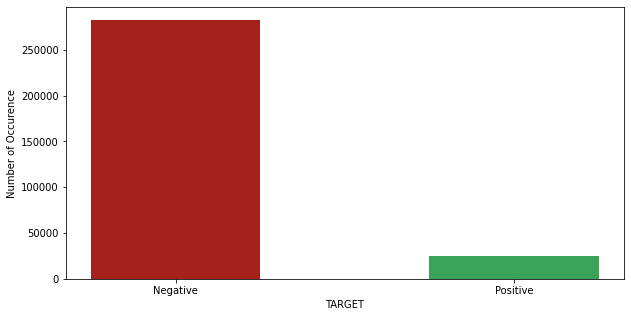

In [7]:
plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(train_df['TARGET'], bins=2, range=(-0.5,1.5), rwidth=0.5)
patches[0].set_facecolor('#A4211C')
patches[1].set_facecolor('#39A459')
plt.xticks(range(2), 'Negative Positive'.split())
plt.xlabel('TARGET')
plt.ylabel('Number of Occurence')
plt.show()

We can see that they are a lot more negative target (value of 0, which mean that the applicant haven't been able to repay the loan) than positive target (value of 1, the opposite)

## Missing values overview :

In [8]:
def missing_values_table(df):
        # Count the total number of missing value in the dataframe
        missing = df.isnull().sum()

        # Makes it a percentage
        percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        table = pd.concat([missing, percent], axis=1)
        
        table_rename = table.rename(columns = {0: 'Number of missing values',1: '% of Total Values'})
        
        return table_rename[table_rename['Number of missing values'] > 0]

In [9]:
train_missing_values = missing_values_table(train_df)
test_missing_values =  missing_values_table(test_df)

In [10]:
print('The training set has ' + str(train_missing_values.shape[0]) + ' columns with missing values')
print('Here are the columns with missing values : ')
train_missing_values

The training set has 67 columns with missing values
Here are the columns with missing values : 


,Number of missing values,% of Total Values
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631


In [11]:
train_missing_values[train_missing_values['% of Total Values'] > 59]

,Number of missing values,% of Total Values
OWN_CAR_AGE,202929,65.990810
YEARS_BUILD_AVG,204488,66.497784
COMMONAREA_AVG,214865,69.872297
FLOORSMIN_AVG,208642,67.848630
LANDAREA_AVG,182590,59.376738
LIVINGAPARTMENTS_AVG,210199,68.354953
NONLIVINGAPARTMENTS_AVG,213514,69.432963
YEARS_BUILD_MODE,204488,66.497784
COMMONAREA_MODE,214865,69.872297
FLOORSMIN_MODE,208642,67.848630


In [12]:
print('The testing set has ' + str(test_missing_values.shape[0]) + ' columns with missing values')
print('Here are the columns with missing values : ')
test_missing_values

The testing set has 64 columns with missing values
Here are the columns with missing values : 


,Number of missing values,% of Total Values
AMT_ANNUITY,24,0.049237
NAME_TYPE_SUITE,911,1.868948
OWN_CAR_AGE,32312,66.289184
OCCUPATION_TYPE,15605,32.014197
EXT_SOURCE_1,20532,42.122107
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,6049,12.409732
AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.409732
AMT_REQ_CREDIT_BUREAU_MON,6049,12.409732
AMT_REQ_CREDIT_BUREAU_QRT,6049,12.409732


In [13]:
test_missing_values[test_missing_values['% of Total Values'] > 59]

,Number of missing values,% of Total Values
OWN_CAR_AGE,32312,66.289184
YEARS_BUILD_AVG,31818,65.275726
COMMONAREA_AVG,33495,68.716150
FLOORSMIN_AVG,32466,66.605121
LIVINGAPARTMENTS_AVG,32780,67.249302
NONLIVINGAPARTMENTS_AVG,33347,68.412523
YEARS_BUILD_MODE,31818,65.275726
COMMONAREA_MODE,33495,68.716150
FLOORSMIN_MODE,32466,66.605121
LIVINGAPARTMENTS_MODE,32780,67.249302


## Unique values overview : 

In [14]:
def unique_df(df):
    ##Count the unique values and data type for each column.
    number_unique = []

    for column in df.columns:
        
        number_unique.append(df[column].nunique())


    df_unique = pd.DataFrame(zip(df.columns, number_unique, [str(dtype) for dtype in df.dtypes]),
                            columns = ["Column name", "Nbr of Unique Values", "Data Type"])
    return df_unique

In [15]:
train_df_unique = unique_df(train_df)
test_df_unique = unique_df(test_df)

In [16]:
print("Unique values in train dataset:")
print()
train_df_unique

Unique values in train dataset:



,Column name,Nbr of Unique Values,Data Type
0,SK_ID_CURR,307511,int64
1,TARGET,2,int64
2,NAME_CONTRACT_TYPE,2,object
3,CODE_GENDER,3,object
4,FLAG_OWN_CAR,2,object
...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,9,float64
118,AMT_REQ_CREDIT_BUREAU_WEEK,9,float64
119,AMT_REQ_CREDIT_BUREAU_MON,24,float64
120,AMT_REQ_CREDIT_BUREAU_QRT,11,float64


Let's see how many features are binary in the training set :

In [17]:
train_df_unique[train_df_unique['Nbr of Unique Values']==2]

,Column name,Nbr of Unique Values,Data Type
1,TARGET,2,int64
2,NAME_CONTRACT_TYPE,2,object
4,FLAG_OWN_CAR,2,object
5,FLAG_OWN_REALTY,2,object
22,FLAG_MOBIL,2,int64
23,FLAG_EMP_PHONE,2,int64
24,FLAG_WORK_PHONE,2,int64
25,FLAG_CONT_MOBILE,2,int64
26,FLAG_PHONE,2,int64
27,FLAG_EMAIL,2,int64


In [18]:
print("Unique values in test dataset:")
print()
test_df_unique

Unique values in test dataset:



,Column name,Nbr of Unique Values,Data Type
0,SK_ID_CURR,48744,int64
1,NAME_CONTRACT_TYPE,2,object
2,CODE_GENDER,2,object
3,FLAG_OWN_CAR,2,object
4,FLAG_OWN_REALTY,2,object
...,...,...,...
116,AMT_REQ_CREDIT_BUREAU_DAY,3,float64
117,AMT_REQ_CREDIT_BUREAU_WEEK,3,float64
118,AMT_REQ_CREDIT_BUREAU_MON,7,float64
119,AMT_REQ_CREDIT_BUREAU_QRT,8,float64


And now if the testing set:

In [19]:
test_df_unique[test_df_unique['Nbr of Unique Values']==2]

,Column name,Nbr of Unique Values,Data Type
1,NAME_CONTRACT_TYPE,2,object
2,CODE_GENDER,2,object
3,FLAG_OWN_CAR,2,object
4,FLAG_OWN_REALTY,2,object
21,FLAG_MOBIL,2,int64
22,FLAG_EMP_PHONE,2,int64
23,FLAG_WORK_PHONE,2,int64
24,FLAG_CONT_MOBILE,2,int64
25,FLAG_PHONE,2,int64
26,FLAG_EMAIL,2,int64


In [20]:
obj = test_df_unique[test_df_unique['Nbr of Unique Values']==2]

In [27]:
obj[obj['Data Type'] == 'object']

,Column name,Nbr of Unique Values,Data Type
1,NAME_CONTRACT_TYPE,2,object
2,CODE_GENDER,2,object
3,FLAG_OWN_CAR,2,object
4,FLAG_OWN_REALTY,2,object
89,EMERGENCYSTATE_MODE,2,object


## Correlations :

Let's see the columns that correlate strongly with the target feature:

In [21]:
train_df.corr()['TARGET'].sort_values().tail(20)

OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64